# Описание данных

Файлы:

## **olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей**

customer_id — позаказный идентификатор пользователя

customer_unique_id  —  уникальный идентификатор пользователя  (аналог номера паспорта)

customer_zip_code_prefix —  почтовый индекс пользователя

customer_city —  город доставки пользователя

customer_state —  штат доставки пользователя

## **olist_orders_dataset.csv —  таблица заказов**

order_id —  уникальный идентификатор заказа (номер чека)

customer_id —  позаказный идентификатор пользователя

order_status —  статус заказа

order_purchase_timestamp —  время создания заказа

order_approved_at —  время подтверждения оплаты заказа

order_delivered_carrier_date —  время передачи заказа в логистическую службу

order_delivered_customer_date —  время доставки заказа

order_estimated_delivery_date —  обещанная дата доставки

## **olist_order_items_dataset.csv —  товарные позиции, входящие в заказы**

order_id —  уникальный идентификатор заказа (номер чека)

order_item_id —  идентификатор товара внутри одного заказа

product_id —  ид товара (аналог штрихкода)

seller_id — ид производителя товара

shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

price —  цена за единицу товара

freight_value —  вес товара

### **Уникальные статусы заказов в таблице olist_orders_dataset:**

created —  создан

approved —  подтверждён

invoiced —  выставлен счёт

processing —  в процессе сборки заказа

shipped —  отгружен со склада

delivered —  доставлен пользователю

unavailable —  недоступен

canceled —  отменён

## Разведочный анализ данных

In [110]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [111]:
# Откроем все датасеты, при импорте сразу преобразуем временные колонки к правильному типу данных
customers_df = pd.read_csv('C:/Users/iamba/Downloads/olist_customers_dataset.csv')
orders_df = pd.read_csv('C:/Users/iamba/Downloads/olist_orders_dataset.csv', \
                        parse_dates=['order_purchase_timestamp', 'order_approved_at', \
                        'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])
items_df = pd.read_csv('C:/Users/iamba/Downloads/olist_order_items_dataset.csv', parse_dates=['shipping_limit_date'])

In [112]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [113]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [114]:
items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [115]:
#Убедимся в том, что все данные имеют правильный тип
customers_df.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [116]:
orders_df.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [117]:
items_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [118]:
#Проверим наши данные на наличие дублей
customers_df.duplicated().sum()

0

In [119]:
orders_df.duplicated().sum()

0

In [120]:
items_df.duplicated().sum()

0

In [121]:
#Проверка на пропуски
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [122]:
#Здесь видим пропуски, вероятно, с заказами что-то произошло и дальше они не логировались
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [123]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### С нашими данными все впорядке, можем приступить к выполнению поставленных задач

## Сколько у нас пользователей, которые совершили покупку только один раз?

Чтобы ответить на вопрос, необходимо сформулировать, что мы будем считать покупкой

Покупкой будем считать те записи, в которых товар перешел в пользование покупателем, т.е. со статусом delivered

Нам нужно замерджить два датафрейма - users_df, содержащего в себе информацию о пользователях, и  orders_df с информацией о заказах.

In [124]:
orders_by_customers_df = customers_df.merge(orders_df, on='customer_id')

In [125]:
orders_by_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [126]:
users_with_only_one_order = orders_by_customers_df.query('order_status == "delivered"') \
    .groupby('customer_unique_id', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'number_of_orders'}) \
    .query('number_of_orders == 1')

In [127]:
number_of_customers_with_only_one_order = users_with_only_one_order.shape[0]

In [128]:
print(f'Число покупателей, совершивших только одну покупку, составляет {number_of_customers_with_only_one_order}.')

Число покупателей, совершивших только одну покупку, составляет 90557.


## Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Для начала определим, сколько заказов в среднем не доставляется ежемесячно

Недоставленными будем считать заказы со статусом canceled и unavailable 

In [129]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [130]:
not_delivered = orders_df.query('order_status == "canceled" | order_status == "unavailable"') \
    .groupby('order_purchase_timestamp', as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'not_delivered'})

In [131]:
not_delivered = not_delivered.sort_values('order_purchase_timestamp')

In [132]:
not_delivered = not_delivered.set_index('order_purchase_timestamp')

In [133]:
not_delivered = not_delivered.resample(rule='M').sum()
not_delivered

,not_delivered
order_purchase_timestamp,
2016-09-30,2
2016-10-31,31
2016-11-30,0
2016-12-31,0
2017-01-31,13
2017-02-28,62
2017-03-31,65
2017-04-30,27
2017-05-31,60


In [134]:
print(f'В среднем ежемесячно не доставляется {np.round(np.mean(not_delivered.not_delivered))} заказов.')
print(f'Всего недоставленных заказов {not_delivered.not_delivered.sum()}')

В среднем ежемесячно не доставляется 47.0 заказов.
Всего недоставленных заказов 1234


Теперь постараемся выяснить причины отмены заказов

Как выяснилось на этапе EDA в таблице с заказами есть пропуски в колонках order_approved_at, order_delivered_carrier_date, order_delivered_customer_date. Поработаем с этими пропусками

Первая причина - у заказа просто не прошла оплата, проверим сколько было таких заказов.

In [135]:
not_aproved_orders = orders_df.query('(order_status == "canceled" | order_status == "unavailable") & order_approved_at == "NaT"')
print(f'Количество недоставленных заказов по причине не подтвержденной оплаты составило {not_aproved_orders.shape[0]}')

Количество недоставленных заказов по причине не подтвержденной оплаты составило 141


Следующие пропуски лежат в столбце с датой передачи в логистическую службу, проверим и это.

In [136]:
not_delivery_carrier = orders_df.query('((order_status == "canceled" | order_status == "unavailable") & order_approved_at != "NaT") & order_delivered_carrier_date == "NaT"')
print(f'Количество заказов не переданных в логистическую службу составило {not_delivery_carrier.shape[0]}')

Количество заказов не переданных в логистическую службу составило 1018


В этой причине разобраться сложнее, т.к. не хватает данных для точного определения первоисточника проблемы

Ясно одно, заказ не передали в логистическую службу для дальнейшей доставки до пользователя

In [137]:
not_delivered_to_customer = orders_df.query('(order_status == "canceled" | order_status == "unavailable") & order_approved_at != "NaT" & order_delivered_carrier_date != "NaT"')
not_delivered_to_customer.shape

(75, 8)

75 заказов были просто не доставлены покупателю, вероятно, они потерялись по пути, либо были отменены на пути к дому кастомера по неизвестным для нас причинам.

Из-за нехватки данных можем выделить 3 довольно обобщенных причины:

1 - заказ не апрувнулся (не прошла оплата, покупатель передумал и т.д.)

2 - не передали в логистику

3 - логисты не доставили заказ до получателя

In [138]:
num_of_not_delivered_orders = [not_aproved_orders.shape[0], not_delivery_carrier.shape[0], not_delivered_to_customer.shape[0]]
reasons_of_cancelling_orders = ['Order not aproved', 'Not transferred to logistics', 'Not delivered to customer']

<function matplotlib.pyplot.show(close=None, block=None)>

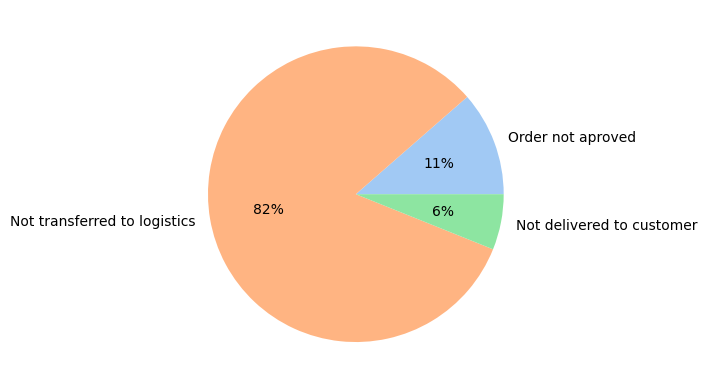

In [139]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(num_of_not_delivered_orders, labels = reasons_of_cancelling_orders, colors = colors, autopct='%.0f%%')
plt.show

##  По каждому товару определить, в какой день недели товар чаще всего покупается.

Исходя из вышеупомянутого опеределения покупки, в этом таске за покупку будем считать все записи со статусом delivered

Далее мёрджим два фрейма - orders_df & items_df

In [140]:
# Сразу офильтруем интересующие нас записи
order_item_df = items_df.merge(orders_df, on='order_id', how='left').query('order_status ==  "delivered"')

In [141]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


Добавим новую колонку в наш дф, которая будет показывать день недели заказа для каждого товара

In [142]:
order_item_df['day_of_week'] = order_item_df.order_purchase_timestamp.dt.day_name()

Проверим к-во уникальных товарных единиц

In [143]:
order_item_df.product_id.nunique()

32216

In [144]:
max_frequency_by_weekday = order_item_df.groupby(['product_id', 'day_of_week'], as_index=False) \
    .agg({'order_item_id': 'count'}) \
    .rename(columns={'order_item_id': 'frequency'}) \
    .sort_values(['frequency', 'day_of_week'], ascending=False) \
    .drop_duplicates(subset='product_id')
max_frequency_by_weekday

,product_id,day_of_week,frequency
15597,422879e10f46682990de24d770e7f83d,Wednesday,93
35751,99a4788cb24856965c36a24e339b6058,Monday,91
40183,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
19711,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
13271,389d119b48cf3043d311335e499d9c6b,Thursday,67
...,...,...,...
59804,ff8bd09f659b88af06fdfea61a8b7b45,Friday,1
59807,ff8ee90ee3170de57403d2d5af1e2c2e,Friday,1
59834,ffa1ce7f2a287ca5e369673bd77d43de,Friday,1
59875,ffbb3c00e9687ad738ace3977e821da5,Friday,1


Получил искомый датафрейм с днем самой частой покупки каждого товара

## Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

In [147]:
# Добавим все нужные для выполнения этого задания колонки: order_date - дата заказа, month - месяц для группировки,
# num_of_days_in_month - к-во дней в каждом месяце для расчета к-ва недель
orders_by_customers_df['order_date'] = pd.to_datetime(orders_by_customers_df.order_purchase_timestamp)
orders_by_customers_df['month'] = orders_by_customers_df.order_date.dt.strftime('%Y-%m')
orders_by_customers_df['num_of_days_in_month'] = orders_by_customers_df.order_date.dt.daysinmonth

In [148]:
orders_by_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,month,num_of_days_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:05:35,2017-05,31
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:48:24,2018-01,31
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-19 16:07:45,2018-05,31
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 16:06:38,2018-03,31
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 09:51:30,2018-07,31


In [149]:
orders_by_weeks = orders_by_customers_df.query('order_status == "delivered"') \
    .groupby(['customer_unique_id', 'month', 'num_of_days_in_month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'num_of_orders'})

In [152]:
# Добавляем к-во недель в месяце для рассчета среднева числа покупок в неделю
orders_by_weeks['num_of_weeks'] = orders_by_weeks.num_of_days_in_month/7

In [153]:
orders_by_weeks['purchases_by_week'] = orders_by_weeks.num_of_orders/orders_by_weeks.num_of_weeks

In [159]:
orders_by_week_in_every_month = orders_by_weeks.groupby(['customer_unique_id', 'month'], as_index=False) \
    .agg({'purchases_by_week':'mean'}) \
    .rename(columns={'purchases_by_week': 'average_purchase_per_week'}) \
    .sort_values(['month', 'average_purchase_per_week'], ascending=False)
orders_by_week_in_every_month

,customer_unique_id,month,average_purchase_per_week
74559,c8460e4251689ba205045f3ea17884a1,2018-08,0.903226
52431,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,0.677419
2090,059e7585d8fcd2430a33375bdbcbb990,2018-08,0.451613
3255,08a374bca4063116d5530a7b04ecaf3f,2018-08,0.451613
8171,15a52a044cbf18c87283f8c460ad5ccf,2018-08,0.451613
...,...,...,...
94974,ff68ad2883e793597f1c343dd6505f5d,2016-10,0.225806
95013,ff822e5e1322cef6c211ad8a0591999e,2016-10,0.225806
95016,ff8557b296729eaa30f078d974c86812,2016-10,0.225806
95096,ffb973f2bb1c0cb807a99341a9b20dcd,2016-10,0.225806


Получил датафрейм с детализацией среднего к-ва заказов в неделю для каждого покупателя в разрезе месяца, осортированного по убыванию.

Для самых свежих активных покупателей можем придумать спец-предложения

## Провести когортный анализ пользователей. В период с января по декабрь выявить когорту с самым высоким retention на 3й месяц.

In [209]:
# Перезапишем дф из предыдущего шага в новый
retention = orders_by_customers_df.copy(deep=True)

In [210]:
retention.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_date,month,num_of_days_in_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2017-05-16 15:05:35,2017-05,31
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,2018-01-12 20:48:24,2018-01,31
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,2018-05-19 16:07:45,2018-05,31
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,2018-03-13 16:06:38,2018-03,31
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,2018-07-29 09:51:30,2018-07,31


In [211]:
# Проверим размах дат, которые нам предоставлены
print(retention.month.min())

2016-09


In [212]:
print(retention.month.max())

2018-10


По заданию нам нужно провести когортный анализ с января по декабрь, для этого нас удовлетворит лишь 2017 год, т.к. только он дан в полном объеме

Отфильтруем данные для когортного анализа, так же возьмем 3 месяца 2018 года, чтобы можно было отследить retention 3-го месяца для декабря

In [213]:
retention = retention.query('month >= "2017-01" & month <= "2018-03"')

In [214]:
print(retention.month.min(), '\n', retention.month.max())

2017-01 
 2018-03


In [215]:
retention = retention.query('order_status == "delivered"')

In [216]:
# Переименуем колонку month в date_of_purchase, более подходящую по смыслу
retention = retention.rename(columns={'month': 'date_of_purchase'})

In [217]:
# Для каждого покупателя найдем дату первой покупки
first_purchase = retention.groupby('customer_unique_id', as_index=False) \
    .agg({'date_of_purchase': 'min'}) \
    .rename(columns={'date_of_purchase': 'date_of_first_purchase'})

In [218]:
# Объединяем в один датафрейм
retention = retention.merge(first_purchase, on='customer_unique_id', how='left')

In [219]:
# Посчитаем число уникальных покупателей для каждого месяца
num_of_uniq_users_by_month = retention.groupby('date_of_first_purchase', as_index=False) \
    .agg({'customer_unique_id': 'nunique'}) \
    .rename(columns={'customer_unique_id': 'num_of_uniq_customers'})

In [220]:
# Мёрджим с нашей основной таблицей, чтобы для каждого месяца определить к-во уникальных покупателей 
retention = retention.merge(num_of_uniq_users_by_month, on='date_of_first_purchase', how='left')  

In [221]:
# Для удобства оставим только те колонки, которые понадобятся в дальнейшей работе
retention = retention[['customer_unique_id', 'date_of_first_purchase', 'date_of_purchase', 'num_of_uniq_customers']]

In [222]:
retention

,customer_unique_id,date_of_first_purchase,date_of_purchase,num_of_uniq_customers
0,861eff4711a542e4b93843c6dd7febb0,2017-05,2017-05,3451
1,290c77bc529b7ac935b93aa66c333dc3,2018-01,2018-01,6843
2,259dac757896d24d7702b9acbbff3f3c,2018-03,2018-03,6775
3,4c93744516667ad3b8f1fb645a3116a4,2017-09,2017-09,4005
4,addec96d2e059c80c30fe6871d30d177,2018-02,2018-02,6288
...,...,...,...,...
64050,d111b06b6f3a2add0d2241325f65b5ca,2018-03,2018-03,6775
64051,e7f8760e2bbd2f1986bebd99596c088e,2017-03,2017-03,2503
64052,4b5820135d360a45552b5163835b1d89,2017-12,2017-12,5338
64053,73c2643a0a458b49f58cea58833b192e,2017-11,2017-11,7061


In [223]:
#  Подготовим наши данные для расчета retention
#  В колонке num_of_uniq_customers общее число пользователей на начало нашего среза
retention = retention.groupby(['date_of_first_purchase', 'date_of_purchase']) \
    .agg({'customer_unique_id': 'nunique', 'num_of_uniq_customers': 'max'}) \
    .rename(columns={'customer_unique_id': 'cohort_size'})

In [224]:
# рассчитываем retention
retention['retention_rate_percent'] = retention.cohort_size/retention.num_of_uniq_customers * 100

In [225]:
retention = retention.reset_index()

In [226]:
#  Функция для нумерации месяцев
def num_month(x):
    num = x.split('-')
    if num[0] == '2017':
        return int(num[1])
    else:
        return int(num[1]) + 12  

In [227]:
retention['num_of_month_retention'] = retention.date_of_purchase.apply(lambda x: num_month(x))

In [228]:
# Делаем сводную таблицу для визуализации retention
pivot_retention = retention.pivot(index='date_of_first_purchase', columns='num_of_month_retention', values='retention_rate_percent')

In [229]:
pivot_retention

num_of_month_retention,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
date_of_first_purchase,,,,,,,,,,,,,,,
2017-01,100.0,0.278552,0.278552,0.139276,0.417827,0.139276,0.417827,0.139276,0.139276,NaN,0.417827,0.139276,0.696379,0.417827,0.139276
2017-02,NaN,100.000000,0.184275,0.307125,0.122850,0.429975,0.122850,0.245700,0.184275,0.122850,0.184275,0.122850,0.307125,0.122850,0.184275
2017-03,NaN,NaN,100.000000,0.439473,0.359569,0.399521,0.359569,0.159808,0.159808,0.319616,0.319616,0.079904,0.359569,0.119856,0.199760
2017-04,NaN,NaN,NaN,100.000000,0.620292,0.221533,0.177226,0.265840,0.265840,0.354453,0.310146,0.310146,0.177226,0.265840,0.088613
2017-05,NaN,NaN,NaN,NaN,100.000000,0.463634,0.463634,0.289771,0.289771,0.318748,0.405680,0.144886,0.260794,0.260794,0.260794
2017-06,NaN,NaN,NaN,NaN,NaN,100.000000,0.493908,0.395127,0.428054,0.296345,0.395127,0.362200,0.230491,0.131709,0.197563
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.532907,0.346390,0.239808,0.293099,0.213163,0.319744,0.106581,0.186517
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.690165,0.345083,0.271136,0.345083,0.517624,0.295785,0.271136
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,0.699126,0.549313,0.274657,0.449438,0.224719,0.224719


<Axes: title={'center': 'Cohorts: User Retention'}, xlabel='num_of_month_retention', ylabel='date_of_first_purchase'>

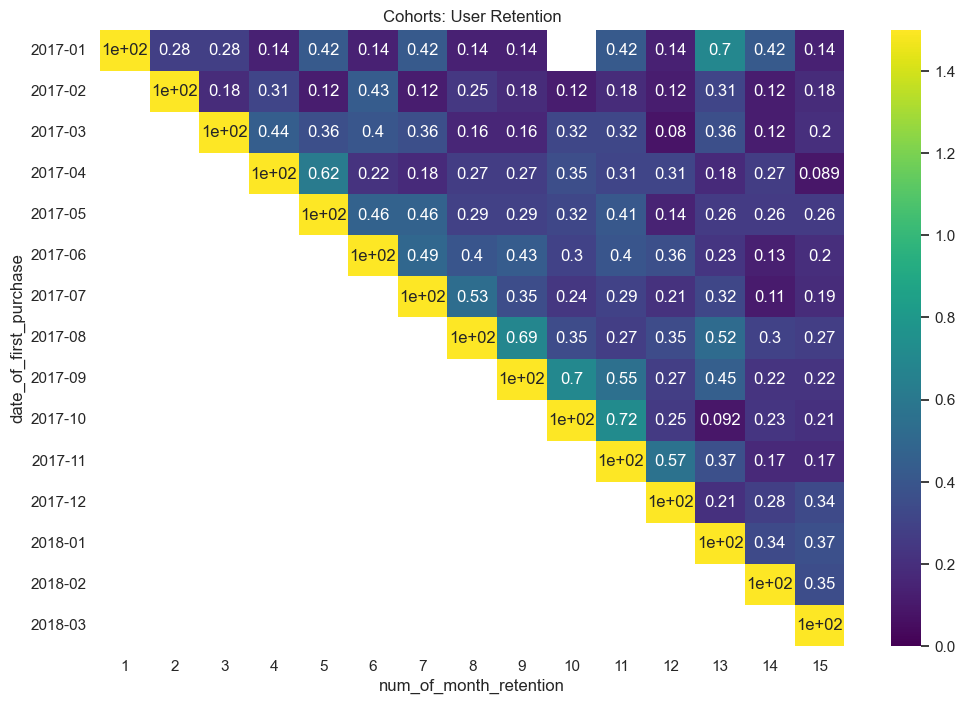

In [230]:
# Самой удобной визуализацией retention послужит heatmap
sns.set(style='white')
plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(pivot_retention,annot=True, vmin=0, vmax=1.5, cmap='viridis')

In [231]:
# Ищем  когорту с самым высоким удержанием на 3-й месяц
list_of_retention = []
for i, row in retention.iterrows():
    x = int(row['date_of_first_purchase'].split('-')[1]) + 3
    if row['num_of_month_retention'] == x:
        list_of_retention.append(row['retention_rate_percent'])

In [232]:
max_value = max(list_of_retention)

In [234]:
cohort_with_max_3dmonth_retention = retention.query('retention_rate_percent == @max_value')

In [237]:
print('Когорта с самыс высоким retention 3-го месяца', '\n', cohort_with_max_3dmonth_retention.date_of_first_purchase)

Когорта с самыс высоким retention 3-го месяца 
 67    2017-06
Name: date_of_first_purchase, dtype: object


## Построить RFM-сегментацию пользователей. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [362]:
# В этом задании нам понадобятся все таблицы, поэтому начнем с их объединения
df_total = orders_by_customers_df.merge(items_df, how='left', on='order_id').query('order_status == "delivered"')

In [363]:
# Охват данных почти за 2 года, но обычно rfm анализ делают за период в один год - попробуем выбрать наиболее интересный для нас
print('Orders from {} to {}'.format(df_total['order_purchase_timestamp'].min(),
                                    df_total['order_purchase_timestamp'].max()))

Orders from 2016-09-15 12:16:38 to 2018-08-29 15:00:37


<Axes: xlabel='month', ylabel='order_id'>

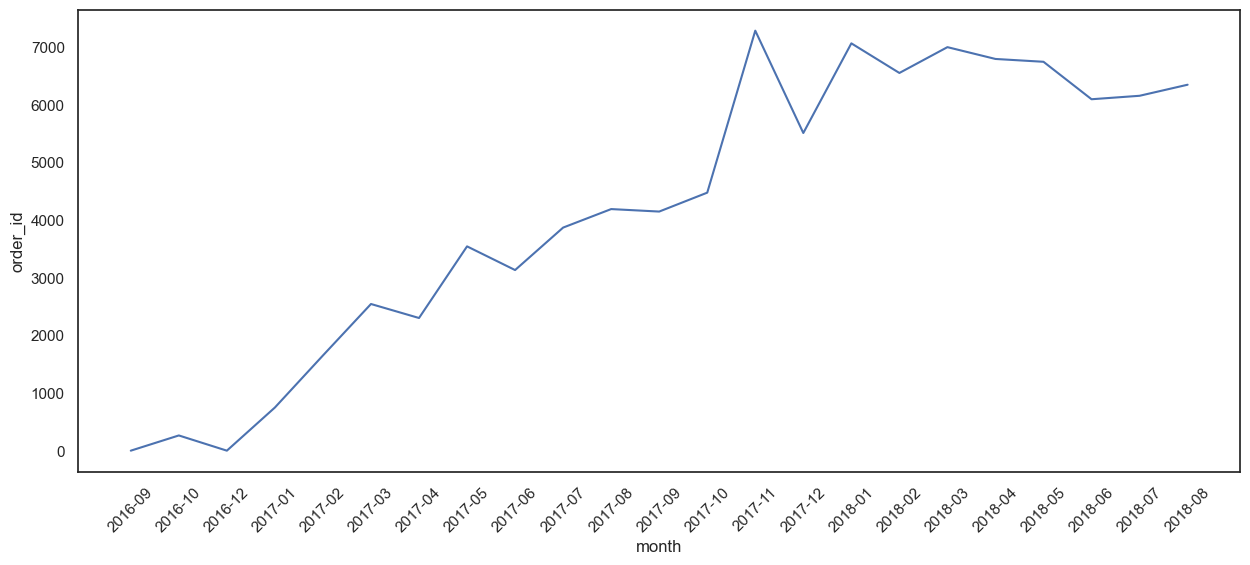

In [364]:
# Посмотрим на распределение заказов
example = df_total.groupby('month', as_index=False).agg({'order_id': 'nunique'})
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.lineplot(data=example, x='month', y='order_id')

2016 год сразу отсеиваем, т.к. к-во заказов очень маленькое, с 2017 года можем наблюдать стремительный рост заказов, с этим будет работать интереснее

Для анализа решил взять период 2017-03 -- 2018-03

In [365]:
# Фильтруем данные
df_total = df_total.query('"2017-03" < month <= "2018-03"')

In [366]:
orders = df_total.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id']).agg({'price': 'sum'}).reset_index()
orders.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.9
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.0
3,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,85c835d128beae5b4ce8602c491bf385,21.9
4,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,635d9ac1680f03288e72ada3a1035803,19.9


Я собираюсь смоделировать анализ, который я выполняю в режиме реального времени, установив NOW дату на один день после последней покупки. Эта дата будет использоваться в качестве ссылки для расчета Recency баллов.

In [367]:
NOW = orders['order_purchase_timestamp'].max() + timedelta(days=1)
NOW

Timestamp('2018-04-01 23:54:10')

In [368]:
orders['Recency'] = orders['order_purchase_timestamp'].apply(lambda x: (NOW - x).days)

In [369]:
aggr = {
    'Recency': lambda x: x.min(),  # Число дней с последней покупки (Recency)
    'order_purchase_timestamp': lambda x: len([d for d in x]), # Общее число покупок (Frequency)
}
rfm = orders.groupby('customer_unique_id').agg(aggr).reset_index()
rfm.rename(columns={'order_purchase_timestamp': 'Frequency'}, inplace=True)
rfm.head()

,customer_unique_id,Recency,Frequency
0,0000f6ccb0745a6a4b88665a16c9f078,171,1
1,0004aac84e0df4da2b147fca70cf8255,138,1
2,00053a61a98854899e70ed204dd4bafe,32,1
3,0005ef4cd20d2893f0d9fbd94d3c0d97,20,1
4,0006fdc98a402fceb4eb0ee528f6a8d4,257,1


In [370]:
monetary = orders.groupby('customer_unique_id').agg({'price': 'sum'}).reset_index() # Общий доход с покупателя
rfm = rfm.merge(monetary, how='left').rename(columns={'price': 'Monetary'})
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f6ccb0745a6a4b88665a16c9f078,171,1,25.99
1,0004aac84e0df4da2b147fca70cf8255,138,1,180.00
2,00053a61a98854899e70ed204dd4bafe,32,1,382.00
3,0005ef4cd20d2893f0d9fbd94d3c0d97,20,1,104.90
4,0006fdc98a402fceb4eb0ee528f6a8d4,257,1,13.90


In [371]:
# Я собираюсь использовать метод квантилей. Сначала я получаю квантили для каждого параметра.
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 51.0, 0.4: 110.0, 0.6: 164.0, 0.8: 250.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 69.0, 0.6: 109.0, 0.8: 179.8}}

In [372]:
#  Затем я пишу методы для присвоения рангов.
#  Меньшее значение Recency лучше, тогда как более высокая Frequency & Monetary показатели лучше.
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5   

In [373]:
#  Теперь я готов получить оценки R, F и M каждого клиента.
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [374]:
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M
0,0000f6ccb0745a6a4b88665a16c9f078,171,1,25.99,2,1,1
1,0004aac84e0df4da2b147fca70cf8255,138,1,180.00,3,1,5
2,00053a61a98854899e70ed204dd4bafe,32,1,382.00,5,1,5
3,0005ef4cd20d2893f0d9fbd94d3c0d97,20,1,104.90,5,1,3
4,0006fdc98a402fceb4eb0ee528f6a8d4,257,1,13.90,1,1,1


In [375]:
# Объединяю оценки R, F и M в RFM Score.
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0000f6ccb0745a6a4b88665a16c9f078,171,1,25.99,2,1,1,211
1,0004aac84e0df4da2b147fca70cf8255,138,1,180.00,3,1,5,315
2,00053a61a98854899e70ed204dd4bafe,32,1,382.00,5,1,5,515
3,0005ef4cd20d2893f0d9fbd94d3c0d97,20,1,104.90,5,1,3,513
4,0006fdc98a402fceb4eb0ee528f6a8d4,257,1,13.90,1,1,1,111


In [376]:
# Пропишем условия для сегментации
segt_map = {
    r'[1-2][1-5][1-2]': 'Бездействующие',
    r'[1-2][1-5][3-4]': 'Риск потенциального оттока',
    r'[1-2][1-5]5': 'Нельзя потерять',
    r'3[1-5][1-2]': 'Спящие клиенты',
    r'3[1-5]3': 'Нуждающие в доп. внимании',
    r'[3-4][1-5][4-5]': 'Постоянные покупатели',
    r'4[1-5]1': 'Многообещающие',
    r'5[1-5]1': 'Новые покупатели',
    r'[4-5][1-5][2-3]': 'Потенциальные постоянники',
    r'5[1-5][4-5]': 'Лучшие из лучших'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,0000f6ccb0745a6a4b88665a16c9f078,171,1,25.99,2,1,1,211,Бездействующие
1,0004aac84e0df4da2b147fca70cf8255,138,1,180.00,3,1,5,315,Постоянные покупатели
2,00053a61a98854899e70ed204dd4bafe,32,1,382.00,5,1,5,515,Лучшие из лучших
3,0005ef4cd20d2893f0d9fbd94d3c0d97,20,1,104.90,5,1,3,513,Потенциальные постоянники
4,0006fdc98a402fceb4eb0ee528f6a8d4,257,1,13.90,1,1,1,111,Бездействующие


In [377]:
segment_count = rfm.groupby('Segment', as_index=False) \
    .agg({'customer_unique_id': 'count'}) \
    .sort_values('customer_unique_id') \
    .rename(columns={'customer_unique_id': 'count_of_customers'})
segment_count

,Segment,count_of_customers
5,Нуждающие в доп. внимании,2263
2,Многообещающие,2446
4,Новые покупатели,2461
9,Спящие клиенты,4528
3,Нельзя потерять,4620
1,Лучшие из лучших,4741
7,Потенциальные постоянники,8775
8,Риск потенциального оттока,8901
6,Постоянные покупатели,9221
0,Бездействующие,9365


<Axes: xlabel='count_of_customers', ylabel='Segment'>

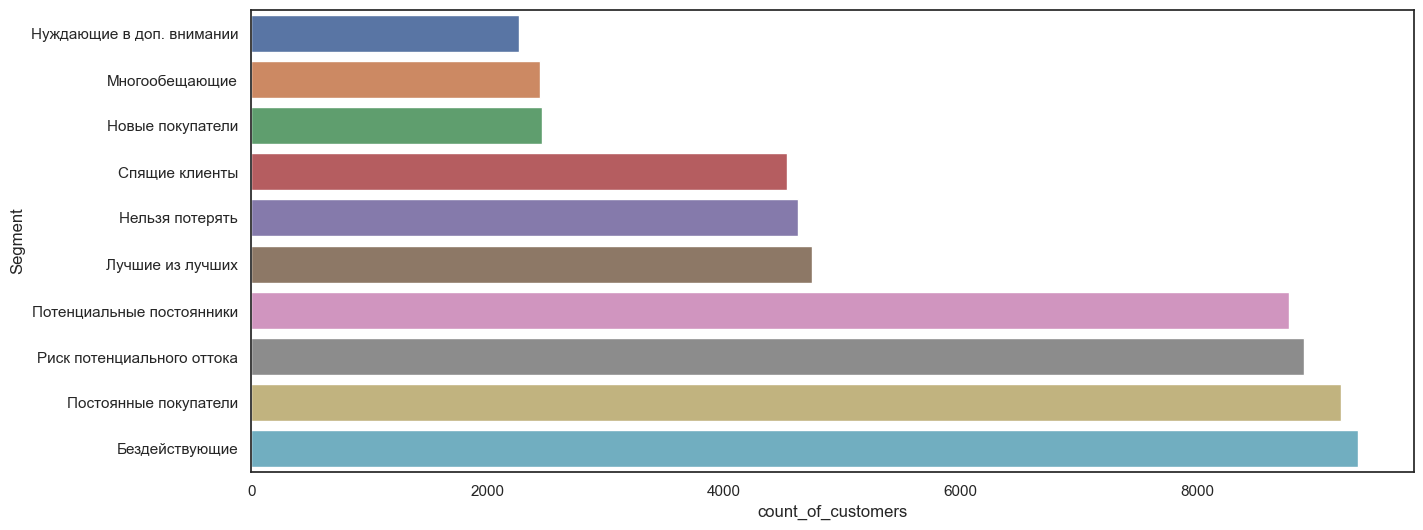

In [378]:
plt.figure(figsize=(15,6))
sns.barplot(x='count_of_customers', y='Segment', data = segment_count)

In [379]:
recency_begin = {1:rfm.Recency.quantile(0.8), 2:rfm.Recency.quantile(0.6), 3:rfm.Recency.quantile(0.4), 4:rfm.Recency.quantile(0.2), 5:0}
recency_end = {1:rfm.Recency.max(), 2:rfm.Recency.quantile(0.8), 3:rfm.Recency.quantile(0.6), 4:rfm.Recency.quantile(0.4), 5:rfm.Recency.quantile(0.2)}

In [380]:
freq_begin = {1:0, 2:rfm.Frequency.quantile(0.2), 3:rfm.Frequency.quantile(0.4), 4:rfm.Frequency.quantile(0.6), 5:rfm.Frequency.quantile(0.8)}
freq_end = {1:rfm.Frequency.quantile(0.2), 2:rfm.Frequency.quantile(0.4), 3:rfm.Frequency.quantile(0.6), 4:rfm.Frequency.quantile(0.8), 5:rfm.Frequency.max()}

In [381]:
monet_begin = {1:0, 2:rfm.Monetary.quantile(0.2), 3:rfm.Monetary.quantile(0.4), 4:rfm.Monetary.quantile(0.6), 5:rfm.Monetary.quantile(0.8)}
monet_end = {1:rfm.Monetary.quantile(0.2), 2:rfm.Monetary.quantile(0.4), 3:rfm.Monetary.quantile(0.6), 4:rfm.Monetary.quantile(0.8), 5:rfm.Monetary.max()}

С помощью словарей выше мы создаем границы для описания rfm scores, будем получать доступ к границам по ключу словаря

In [382]:
# Создаем функцию для описания границ
def description(score):
    r = int(score[0])
    f = int(score[1])
    m = int(score[2])
    R_scores = 'от ' + str(recency_begin[r]) + ' до ' + str(recency_end[r]) + " дней с даты последней покупки "
    F_scores = 'от ' + str(freq_begin[f]) + ' до ' + str(freq_end[f]) + " покупок в год "
    M_scores = 'от ' + str(monet_begin[m]) + ' до ' + str(monet_end[m]) + " руб. в год "
    return ("Границы метрик R: " + R_scores + " F: " + F_scores + " M: " + M_scores)

In [386]:
# Создаем новую колонку с описательной характеристикой 
rfm['description'] = rfm['RFM_Score'].apply(description)

In [387]:
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [390]:
answer_df = rfm.groupby(['RFM_Score', 'Segment', 'description'], as_index=False) \
    .agg({'customer_unique_id': 'count'}) \
    .rename(columns={'customer_unique_id': 'count_of_customers'})
answer_df

,RFM_Score,Segment,description,count_of_customers
0,111,Бездействующие,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 0 до 1.0 покупок в год M: от 0 до 39.9 руб. в год,2482
1,112,Бездействующие,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 0 до 1.0 покупок в год M: от 39.9 до 69.0 руб. в год,2212
2,113,Риск потенциального оттока,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 0 до 1.0 покупок в год M: от 69.0 до 109.0 руб. в год,2262
3,114,Риск потенциального оттока,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 0 до 1.0 покупок в год M: от 109.0 до 179.8 руб. в год,2085
4,115,Нельзя потерять,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 0 до 1.0 покупок в год M: от 179.8 до 13440.0 руб. в год,2173
5,151,Бездействующие,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 1.0 до 9 покупок в год M: от 0 до 39.9 руб. в год,7
6,152,Бездействующие,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 1.0 до 9 покупок в год M: от 39.9 до 69.0 руб. в год,25
7,153,Риск потенциального оттока,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 1.0 до 9 покупок в год M: от 69.0 до 109.0 руб. в год,36
8,154,Риск потенциального оттока,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 1.0 до 9 покупок в год M: от 109.0 до 179.8 руб. в год,65
9,155,Нельзя потерять,Границы метрик R: от 250.0 до 365 дней с даты последней покупки F: от 1.0 до 9 покупок в год M: от 179.8 до 13440.0 руб. в год,105


Сгруппировали дф по 3-м колонкам и получили решение поставленной задачи